In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time

# Load your trained model
from tensorflow.keras.models import load_model
model_5min = load_model('model_5min.h5')  # Load your 5-min prediction model

# Fetch historical Bank Nifty data to fit the scaler (so it matches your training)
ticker = "^NSEBANK"  # Replace with Bank Nifty ticker symbol
historical_data = yf.download(ticker, period='5d', interval='5m')  # Get 5 days of minute data

# Preprocess the historical data (just like in your training)
if not historical_data.empty:
    historical_data = historical_data[['Open', 'High', 'Low', 'Close']]  # Use the same features
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler only on historical data
    scaled_historical_data = scaler.fit_transform(historical_data)
else:
    print("No historical data found!")

# Now, you're ready to use the trained model on live data
def predict_live_data():
    while True:
        # Fetch and preprocess live data (1 minute intervals)
        live_data = yf.download(ticker, period='1d', interval='1m')  # Fetch 2 days of minute data

        # Check if live data is empty
        if live_data.empty:
            print("No live data found! Skipping this cycle.")
            time.sleep(5)  # Wait 1 minute and try again
            continue

        # Print data to validate
        print(live_data.head())
        print(live_data.shape)

        # Preprocess live data if it exists
        live_data = live_data[['Open', 'High', 'Low', 'Close']]

        # Apply the scaler
        try:
            scaled_live_data = scaler.transform(live_data)  # Apply transform, not fit_transform
        except ValueError as e:
            print(f"Error scaling live data: {e}")
            time.sleep(5)  # Wait 1 minute and try again
            continue

        # Use the last 60 data points for prediction
        if len(scaled_live_data) < 60:
            print("Not enough data for prediction! Waiting for more data.")
            time.sleep(60)  # Wait for more data to accumulate
            continue

        X_live = np.array([scaled_live_data[-60:]])  # Reshape the last 60 data points

        # Reshape to match the LSTM model's input shape
        X_live = np.reshape(X_live, (X_live.shape[0], X_live.shape[1], 4))  # Shape: (1, 60, 4)

        # Make prediction
        predicted_price = model_5min.predict(X_live)

        # Inverse transform to get the actual predicted price
        predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_price[0][0]]])[0][3]  # Extract only the Close price

        # Output predicted price
        print(f"Predicted 5-minute Close Price: {predicted_price}")

        # Wait for 1 minute before running the prediction again
        time.sleep(5)

# Start the prediction loop
predict_live_data()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-09-19 09:15:00+05:30  52935.949219  53097.851562  52912.199219   
2024-09-19 09:16:00+05:30  53090.199219  53131.949219  53076.500000   
2024-09-19 09:17:00+05:30  53112.000000  53141.550781  53099.050781   
2024-09-19 09:18:00+05:30  53131.851562  53155.601562  53119.199219   
2024-09-19 09:19:00+05:30  53148.601562  53190.449219  53148.601562   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-09-19 09:15:00+05:30  53097.851562  53097.851562       0  
2024-09-19 09:16:00+05:30  53111.800781  53111.800781       0  
2024-09-19 09:17:00+05:30  53127.300781  53127.300781       0  
2024-09-19 09:18:00+05:30  53155.601562  53155.601562       0  
2024-09-19 09:19:00+05:30  53183.101562  53183.101562       0  
(101, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predic

[*********************100%***********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2024-09-19 09:15:00+05:30  52935.949219  53097.851562  52912.199219   
2024-09-19 09:16:00+05:30  53090.199219  53131.949219  53076.500000   
2024-09-19 09:17:00+05:30  53112.000000  53141.550781  53099.050781   
2024-09-19 09:18:00+05:30  53131.851562  53155.601562  53119.199219   
2024-09-19 09:19:00+05:30  53148.601562  53190.449219  53148.601562   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-09-19 09:15:00+05:30  53097.851562  53097.851562       0  
2024-09-19 09:16:00+05:30  53111.800781  53111.800781       0  
2024-09-19 09:17:00+05:30  53127.300781  53127.300781       0  
2024-09-19 09:18:00+05:30  53155.601562  53155.601562       0  
2024-09-19 09:19:00+05:30  53183.101562  53183.101562       0  
(101, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Predicted 5-minute Close Price: 53154.31355557126


[*********************100%***********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2024-09-19 09:15:00+05:30  52935.949219  53097.851562  52912.199219   
2024-09-19 09:16:00+05:30  53090.199219  53131.949219  53076.500000   
2024-09-19 09:17:00+05:30  53112.000000  53141.550781  53099.050781   
2024-09-19 09:18:00+05:30  53131.851562  53155.601562  53119.199219   
2024-09-19 09:19:00+05:30  53148.601562  53190.449219  53148.601562   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-09-19 09:15:00+05:30  53097.851562  53097.851562       0  
2024-09-19 09:16:00+05:30  53111.800781  53111.800781       0  
2024-09-19 09:17:00+05:30  53127.300781  53127.300781       0  
2024-09-19 09:18:00+05:30  53155.601562  53155.601562       0  
2024-09-19 09:19:00+05:30  53183.101562  53183.101562       0  
(101, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Predicted 5-minute Close Price: 53155.55435166881


[*********************100%***********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2024-09-19 09:15:00+05:30  52935.949219  53097.851562  52912.199219   
2024-09-19 09:16:00+05:30  53090.199219  53131.949219  53076.500000   
2024-09-19 09:17:00+05:30  53112.000000  53141.550781  53099.050781   
2024-09-19 09:18:00+05:30  53131.851562  53155.601562  53119.199219   
2024-09-19 09:19:00+05:30  53148.601562  53190.449219  53148.601562   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-09-19 09:15:00+05:30  53097.851562  53097.851562       0  
2024-09-19 09:16:00+05:30  53111.800781  53111.800781       0  
2024-09-19 09:17:00+05:30  53127.300781  53127.300781       0  
2024-09-19 09:18:00+05:30  53155.601562  53155.601562       0  
2024-09-19 09:19:00+05:30  53183.101562  53183.101562       0  
(101, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Predicted 5-minute Close Price: 53155.55435166881


KeyboardInterrupt: 

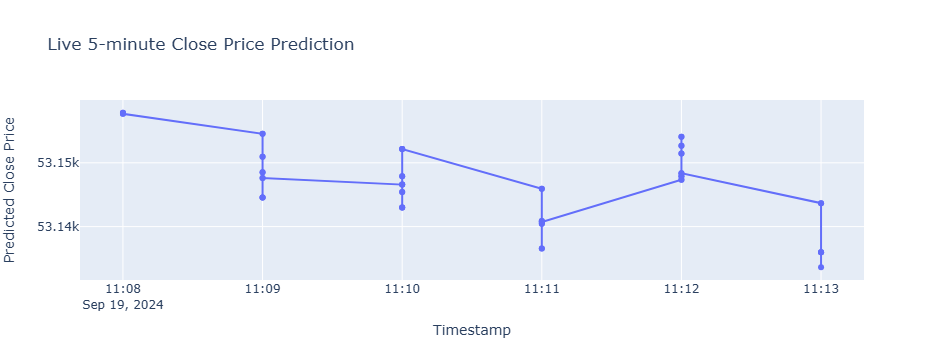

KeyboardInterrupt: 

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
import plotly.graph_objects as go
from tensorflow.keras.models import load_model
from IPython.display import display, clear_output

# Load your trained model
model_5min = load_model('model_5min.h5')

# Fetch historical Bank Nifty data to fit the scaler (so it matches your training)
ticker = "^NSEBANK"
historical_data = yf.download(ticker, period='5d', interval='5m')

# Preprocess the historical data
if not historical_data.empty:
    historical_data = historical_data[['Open', 'High', 'Low', 'Close']]
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler only on historical data
    scaled_historical_data = scaler.fit_transform(historical_data)
else:
    print("No historical data found!")

# Initialize the figure for live plotting
fig = go.Figure()

# Add a trace for predicted price
fig.add_trace(go.Scatter(x=[], y=[], mode='lines+markers', name='Predicted Price'))

# Configure the layout of the graph
fig.update_layout(
    title="Live 5-minute Close Price Prediction",
    xaxis_title="Timestamp",
    yaxis_title="Predicted Close Price",
    hovermode="x unified"
)

# Display the initial graph
fig.show()

# Initialize empty lists to store timestamps and predicted prices
timestamps = []
predicted_prices = []

# Function for live prediction
def predict_live_data():
    while True:
        # Fetch and preprocess live data (1 minute intervals)
        live_data = yf.download(ticker, period='1d', interval='1m')

        # Check if live data is empty
        if live_data.empty:
            print("No live data found! Skipping this cycle.")
            time.sleep(1)  # Wait 1 minute and try again
            continue

        # Preprocess live data
        live_data = live_data[['Open', 'High', 'Low', 'Close']]

        # Apply the scaler
        try:
            scaled_live_data = scaler.transform(live_data)
        except ValueError as e:
            print(f"Error scaling live data: {e}")
            time.sleep(1)  # Wait 1 minute and try again
            continue

        # Use the last 60 data points for prediction
        if len(scaled_live_data) < 60:
            print("Not enough data for prediction! Waiting for more data.")
            time.sleep(60)
            continue

        X_live = np.array([scaled_live_data[-60:]])

        # Reshape to match the LSTM model's input shape
        X_live = np.reshape(X_live, (X_live.shape[0], X_live.shape[1], 4))

        # Make prediction
        predicted_price = model_5min.predict(X_live)

        # Inverse transform to get the actual predicted price
        predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_price[0][0]]])[0][3]

        # Get the current timestamp
        current_time = live_data.index[-1]

        # Append the predicted price and timestamp to the lists
        timestamps.append(current_time)
        predicted_prices.append(predicted_price)

        # Output predicted price
        print(f"Predicted 5-minute Close Price: {predicted_price}")

        # Update the graph with the new data (without creating a new graph)
        fig.data[0].x = timestamps
        fig.data[0].y = predicted_prices
        
        # Clear the previous plot and display the updated graph
        clear_output(wait=True)
        display(fig)

        # Wait for 1 minute before running the prediction again
        time.sleep(5)

# Start the live prediction and graph update
predict_live_data()


In [ ]:
# Check if the dataframe is empty
print(data.head())
print(data.shape)


In [ ]:

# Ticker for Bank Nifty
ticker = "^NSEBANK"

# Download data for the last 5 days with a 5-minute interval
data = yf.download(ticker, period="5d", interval="1m")

# Check if data is empty
if data.empty:
    print("No data returned from yfinance. Please check the ticker symbol and availability of data.")
else:
    print(data.head())  # Display the first few rows of data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Load your trained model
model_5min = load_model('model_5min.h5')  # Load your 5-min prediction model

# Fetch the last 5 days of Bank Nifty data using Yahoo Finance
ticker = "^NSEBANK"  # Replace with Bank Nifty ticker symbol (or any other symbol)
historical_data = yf.download(ticker, period='3d', interval='1m')  # Get 5 days of minute data

# Check if data is downloaded correctly
if historical_data.empty:
    print("No historical data found!")
else:
    # Preprocess the historical data (same steps as used during training)
    historical_data = historical_data[['Open', 'High', 'Low', 'Close']]  # Use the same features
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler only on the historical data (just like in training)
    scaled_historical_data = scaler.fit_transform(historical_data)

    # Use the last 60 data points (as per window_size) for prediction
    window_size = 60  # Same window size as used in training

    # Ensure there are enough data points
    if len(scaled_historical_data) >= window_size:
        # Extract the last 60 data points to test
        X_static = np.array([scaled_historical_data[-window_size:]])

        # Reshape the data to match the model's input shape
        X_static = np.reshape(X_static, (X_static.shape[0], X_static.shape[1], 4))  # Shape: (1, 60, 4)

        # Make predictions
        predicted_price = model_5min.predict(X_static)

        # Inverse transform to get the actual predicted price
        predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_price[0][0]]])[0][3]  # Extract only the Close price

        # Print the predicted price
        print(f"Predicted 5-minute Close Price: {predicted_price}")
    else:
        print("Not enough data for prediction!")


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import plotly.graph_objects as go

# Load your trained model
model_5min = load_model('model_5min.h5')  # Load your 5-min prediction model

# Fetch the last 5 days of Bank Nifty data using Yahoo Finance
ticker = "^NSEBANK"  # Replace with Bank Nifty ticker symbol
historical_data = yf.download(ticker, period='5d', interval='5m')  # Get 5 days of minute data

# Check if data is downloaded correctly
if historical_data.empty:
    print("No historical data found!")
else:
    # Preprocess the historical data (same steps as used during training)
    historical_data = historical_data[['Open', 'High', 'Low', 'Close']]  # Use the same features
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler only on the historical data (just like in training)
    scaled_historical_data = scaler.fit_transform(historical_data)

    # Use the last 60 data points (as per window_size) for prediction
    window_size = 60  # Same window size as used in training
    predictions = []
    prediction_dates = []

    # Loop through the data to make predictions for each time step
    for i in range(window_size, len(scaled_historical_data)):
        X_static = np.array([scaled_historical_data[i - window_size:i]])

        # Reshape the data to match the model's input shape
        X_static = np.reshape(X_static, (X_static.shape[0], X_static.shape[1], 4))  # Shape: (1, 60, 4)

        # Make prediction
        predicted_price = model_5min.predict(X_static)

        # Inverse transform to get the actual predicted price
        predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_price[0][0]]])[0][3]

        # Store the prediction and the corresponding date
        predictions.append(predicted_price)
        prediction_dates.append(historical_data.index[i])

    # Convert lists to pandas Series for easier plotting
    predictions = pd.Series(predictions, index=prediction_dates)

    # Create an interactive plot using Plotly
    fig = go.Figure()

    # Add actual close prices to the plot
    fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Close'], mode='lines', name='Actual Close Price'))

    # Add predicted close prices to the plot
    fig.add_trace(go.Scatter(x=predictions.index, y=predictions.values, mode='lines', name='Predicted Close Price', line=dict(dash='dot')))

    # Customize the layout
    fig.update_layout(
        title='Bank Nifty 5-Minute Close Price Prediction',
        xaxis_title='Time',
        yaxis_title='Price',
        hovermode='x unified'
    )

    # Show interactive plot
    fig.show()


In [ ]:
from alpha_vantage.timeseries import TimeSeries

# Initialize the Alpha Vantage API with your key
api_key = 'BOM2240701AL3828166'
ts = TimeSeries(key=api_key, output_format='pandas')

# Get 1-minute real-time data for Bank Nifty (or another stock)
data, meta_data = ts.get_intraday(symbol='^NSEBANK', interval='1min', outputsize='compact')

# Print the data
print(data.head())


In [ ]:
!pip install alpha_vantage